In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../parkingdata/clean_parking_violations.tsv', delimiter='\t', parse_dates=True)
df = df.sort_values(by="ticket_issue_datetime")
df['ticket_issue_datetime'] = pd.to_datetime(df.ticket_issue_datetime)
df['total'] = 1 # makes counting cleaner

In [6]:
df['weekday'] = df['ticket_issue_datetime'].apply(lambda x: x.weekday())
df['year'] = df['ticket_issue_datetime'].apply(lambda x: x.year)
df['month'] = df['ticket_issue_datetime'].apply(lambda x: x.month)


In [7]:
df['year-month'] = df.year.astype(str) + '-' + df.month.astype(str)


In [8]:
groupby_year_month = df.groupby(['year','month']).total.count().reset_index()
average_per_month = groupby_year_month.groupby('month').total.mean().reset_index()
average_per_month

,month,total
0,1,141732
1,2,115615
2,3,176299
3,4,193942
4,5,172649
5,6,175203
6,7,173120
7,8,177289
8,9,169749
9,10,151573


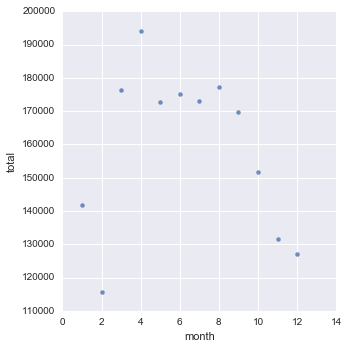

In [132]:
sns.lmplot('month','total', data=average_per_month, fit_reg=False)


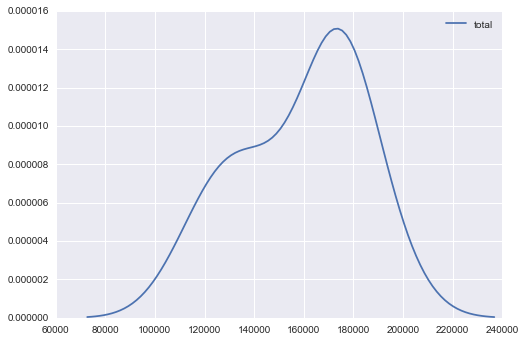

In [134]:
sns.kdeplot(average_per_month.total)


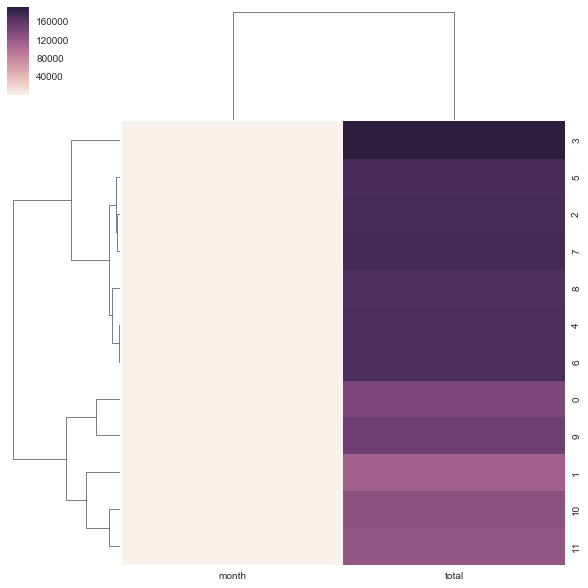

In [135]:
sns.clustermap(average_per_month)


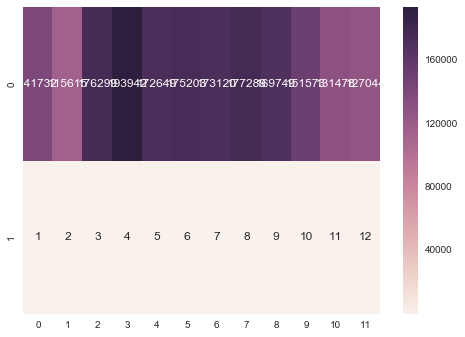

In [140]:
sns.heatmap([average_per_month.total, average_per_month.month], annot=True, fmt="d")


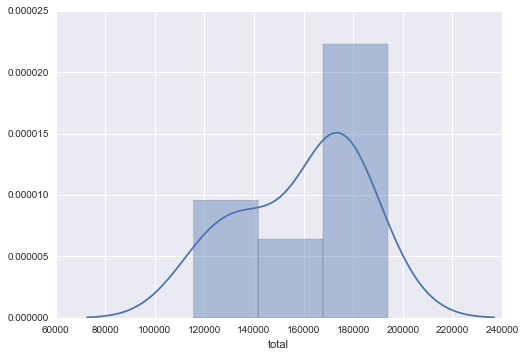

In [137]:
sns.distplot(average_per_month.total)


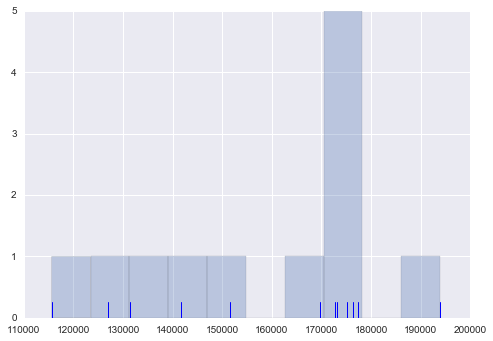

In [139]:
plt.hist(average_per_month.total, alpha=.3)
sns.rugplot(average_per_month.total);

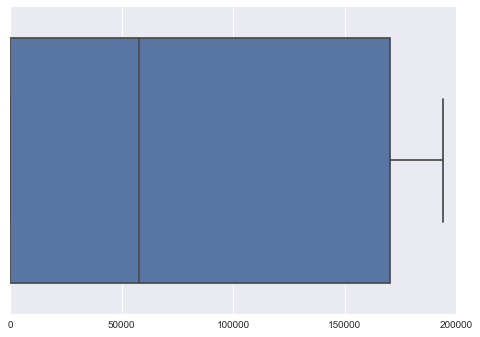

In [143]:
sns.boxplot([average_per_month.total, average_per_month.month])


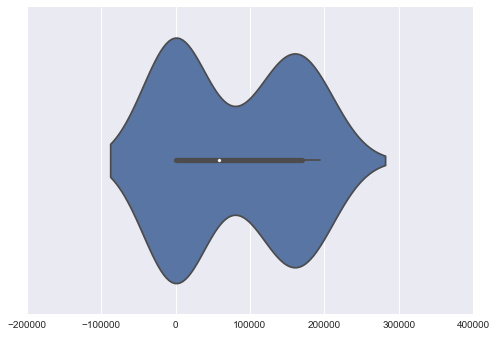

In [145]:
sns.violinplot([average_per_month.month, average_per_month.total])


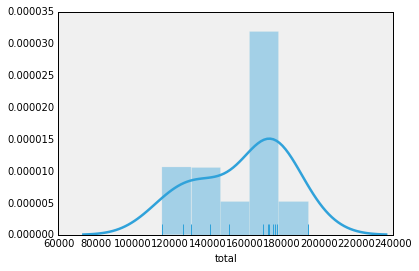

In [15]:
sns.distplot(average_per_month.total, bins=5, kde=True, rug=True);

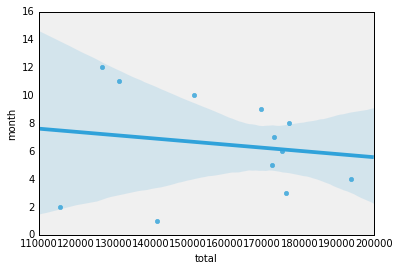

In [16]:
sns.regplot(x="total", y="month", data=average_per_month);

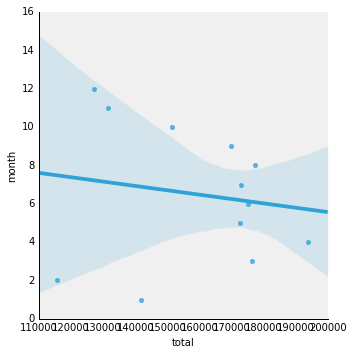

In [17]:
sns.lmplot(x="total", y="month", data=average_per_month);